In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


importing all required libreries

In [2]:
df=pd.read_csv("C:\\Users\\91771\\OneDrive\\Desktop\\datasets\\kaggel\\titenic\\train.csv")


imported the titanic dataset into our notebook

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# desciption:
This is Titanic dataset  It contains information about passengers aboard the RMS Titanic, including details such as their age, sex, class, fare, and whether or not they survived the sinking of the ship.

The goal of working with this dataset is often to build predictive models that can predict whether a given passenger survived or not based on the available features. It's commonly used as a beginner-friendly dataset for practicing data analysis, feature engineering 
# It contains the following columns:
*PassengerId*: A unique identifier for each passenger.

**Survived**: Indicates whether the passenger survived (1) or did not survive (0).

**Pclass**: The class of the ticket the passenger purchased (1st, 2nd, or 3rd).

**Name**: The name of the passenger.

**Sex**: The gender of the passenger (male or female).

**Age**: The age of the passenger.

**SibSp**: The number of siblings or spouses the passenger had aboard the Titanic.

**Parch**: The number of parents or children the passenger had aboard the Titanic.

**Ticket**: The ticket number.

**Fare**: The amount of money the passenger paid for the ticket.

**Cabin**: The cabin number where the passenger stayed.

**Embarked**: The port where the passenger boarded the Titanic (C = Cherbourg, Q = Queenstown, S = Southampton).


# rough opservation from the dataset:
    -in name column name is in the form of title,name we should make it in correct order and in bracket (nickname is given)
    -age column has missing values
    -ticket column contains string and number together
    -cabin column has many missing values
    -embarked column has some missing values

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df.shape

(891, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.duplicated().sum()

0

##  handling missing values 

## **age column** :filling missing values
+ to fill missing value we can check is there any relation between the age of the people who have survive and who havn't survived. 

In [9]:
df[["Age","Survived"]].corr()

,Age,Survived
Age,1.000000,-0.077221
Survived,-0.077221,1.000000


it shows there is negatice relation means the number of people survived is inversely preportional to the age of people :higher the sruvival lower the age.
now we can take mean of the people who have survived and filled it in missing age of survial row and similarly we can do it for not survived people.

In [10]:
average_age_of_survived=df[df["Survived"]==1]["Age"].mean()
average_age_of_notsurvived=df[df["Survived"]==0]["Age"].mean()

In [11]:
average_age_of_survived,average_age_of_notsurvived

(28.343689655172415, 30.62617924528302)

In [12]:
df.loc[df["Survived"]==1,"Age"]=df.loc[df["Survived"]==1,"Age"].fillna(average_age_of_survived)

In [13]:
df.loc[df["Survived"]==0,"Age"]=df.loc[df["Survived"]==0,"Age"].fillna(average_age_of_notsurvived)

we have filled the missing values in Age columns.

In [14]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

+ now we will observe cabin columns and try to fill it .
+ we can see there are few entries with initial letter we can check if that letter belong to the location of ship.
+ we have checked but ther is not any relation bteween them. 
+ now we will chek for embarked column ,  after observing the missing place we have seen the missing value occured exctly at cabin B28 and most of the Cabin staring with B has rmbarked station as S. so using this asumption we can fill the Data of embarked with S at missing places.

In [16]:
df.groupby("Cabin")["PassengerId"].count().sort_values(ascending=False).head(20)
#here we didn't got any good relation with any other columns.

Cabin
C23 C25 C27        4
G6                 4
B96 B98            4
F2                 3
C22 C26            3
E101               3
F33                3
D                  3
C78                2
B57 B59 B63 B66    2
B58 B60            2
E24                2
E121               2
B77                2
C92                2
C123               2
C124               2
C125               2
C126               2
D36                2
Name: PassengerId, dtype: int64

In [17]:
df.loc[df["Cabin"]=="B28","Embarked"]=df.loc[df["Cabin"]=="B28","Embarked"].fillna("S")

In [18]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [19]:
df.shape

(891, 12)

as we didnt get any relation with cabin column hence we are droping entire cabin column as it has 70% data null and we are not able to fill it logicallty .

In [20]:
df=df.drop(columns=["Cabin"])

In [21]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [24]:
temp1=df.groupby(["Survived"])["PassengerId"].count().reset_index()
# Survived	PassengerId

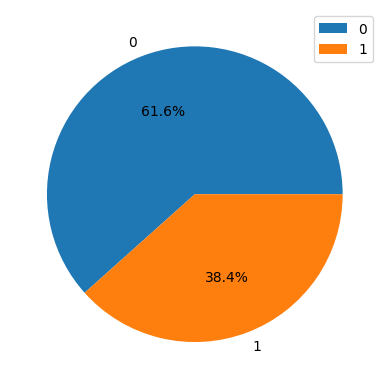

In [28]:
plt.pie(temp1["PassengerId"],labels=temp1["Survived"],autopct='%0.1f%%')
plt.legend()

In [32]:
temp2=df.groupby("Pclass")["PassengerId"].count().reset_index()

# Pclass	PassengerId
# 0	1	216
# 1	2	184
# 2	3	49

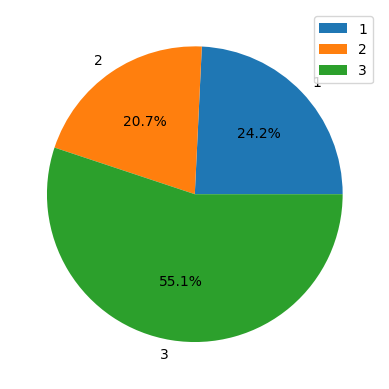

In [34]:
plt.pie(temp2["PassengerId"],labels=temp2["Pclass"],autopct='%0.1f%%')
plt.legend()

<Axes: xlabel='PassengerId', ylabel='Age'>

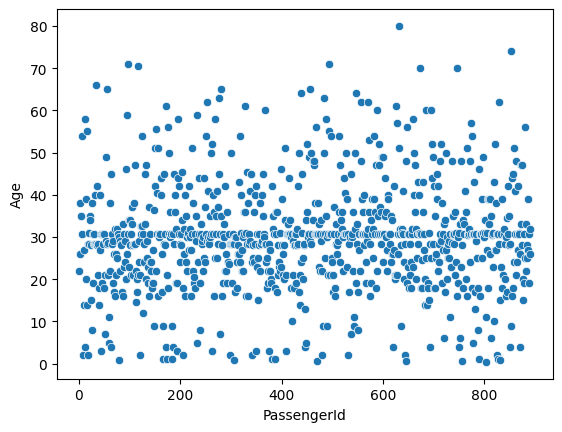

In [36]:
sns.scatterplot(data=df,y="Age",x="PassengerId")

#####  it is clear that ages are between 80 and 0 . hence no outlier.

In [37]:
df["Family_total"]=df["Parch"]+df["SibSp"]

In [38]:
df["title"]=df["Name"].apply(lambda x: "Mr."if "Mr." in x else "MRs." if "MRs."  in x else "Miss" if "Miss" in x else "Master" if "Master" in x else "NoTitle")

In [75]:
temp3=df.groupby("Sex")["PassengerId"].count().reset_index()
# 	Sex	PassengerId
# 0	female	314
# 1	male	577

Text(0, 0.5, 'number of passenger')

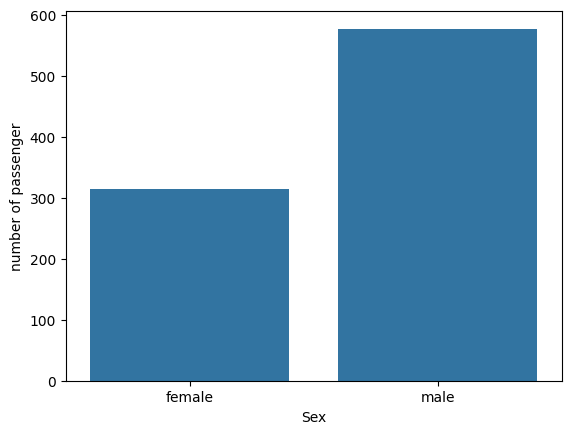

In [77]:
sns.barplot(data=temp3,x="Sex",y="PassengerId")
plt.ylabel("number of passenger")

In [100]:
temp4=df.groupby(["Pclass","Sex"])["PassengerId"].count().reset_index()

# Pclass	Sex	PassengerId
# 0	1	female	94
# 1	1	male	122
# 2	2	female	76
# 3	2	male	108
# 4	3	female	144
# 5	3	male	347

Text(0, 0.5, 'Number of people')

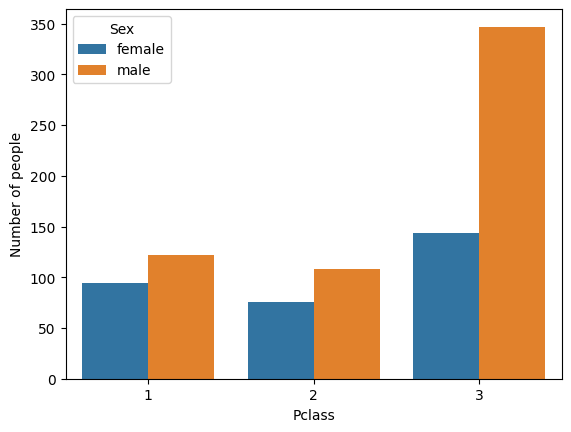

In [101]:
sns.barplot(data=temp4,x="Pclass",y="PassengerId",hue="Sex")
plt.ylabel("Number of people")

<Axes: xlabel='Age', ylabel='Count'>

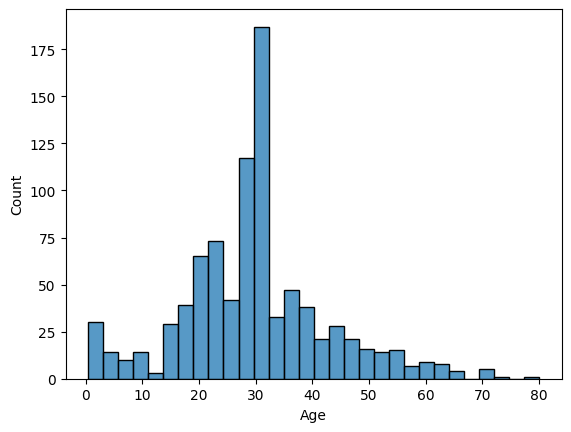

In [102]:
sns.histplot(data=df,x="Age")

This histogram tells us that there is no outlier and the max people are in the age group of approx 30 years.

In [103]:
df[["Pclass","Fare"]].corr()

,Pclass,Fare
Pclass,1.0000,-0.5495
Fare,-0.5495,1.0000


+ It shows that higher the claas lesser will be Fare,inverselly preportional

<Axes: xlabel='PassengerId', ylabel='Age'>

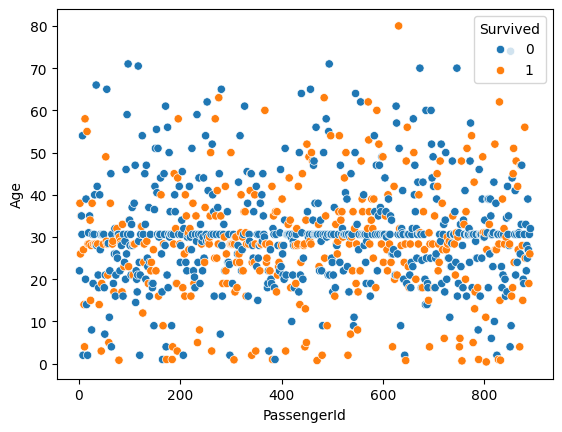

In [111]:
sns.scatterplot(data=df,y="Age",x="PassengerId",hue="Survived")

From the above plot we can see that mostly people died in the age near by 30 , and ther are few people who have survived with high age and most of the child can't survived whose age is below 10.

In [114]:
temp5=df.groupby("Survived")["Age"].mean().reset_index()

# Survived	Age
# 0	0	30.626179
# 1	1	28.343690

<Axes: xlabel='Survived', ylabel='Age'>

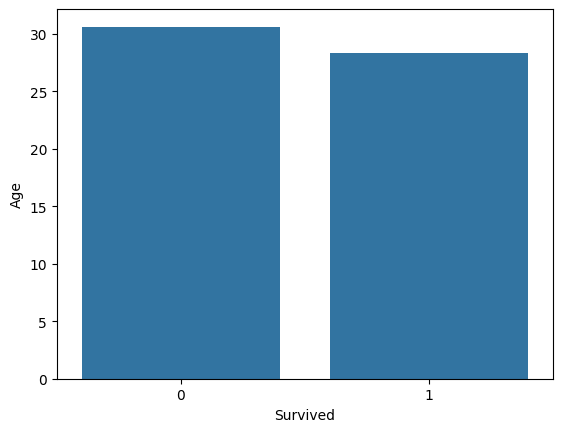

In [124]:
sns.barplot(data=temp5,y="Age",x="Survived")

In [125]:
df.groupby(["Pclass"])["Fare"].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [131]:
temp6=df.groupby(["Pclass","Sex"])["Survived"].mean().reset_index()
# 	Pclass	Sex	PassengerId
# 0	1	female	94
# 1	1	male	122
# 2	2	female	76
# 3	2	male	108
# 4	3	female	144
# 5	3	male	347

In [133]:
temp6

,Pclass,Sex,Survived
0,1,female,0.968085
1,1,male,0.368852
2,2,female,0.921053
3,2,male,0.157407
4,3,female,0.500000
5,3,male,0.135447


Text(0, 0.5, 'survivality')

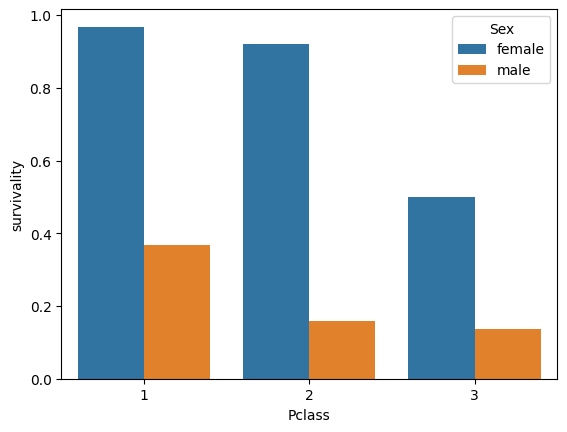

In [137]:
sns.barplot(data=temp6,x="Pclass",y="Survived",hue="Sex")
plt.ylabel("survivality")

In [143]:
temp7=df.groupby(["Embarked","Survived"])["PassengerId"].count().reset_index()

# Embarked	Survived	PassengerId
# 0	C	0	75
# 1	C	1	93
# 2	Q	0	47
# 3	Q	1	30
# 4	S	0	427
# 5	S	1	219

<Axes: xlabel='Embarked', ylabel='PassengerId'>

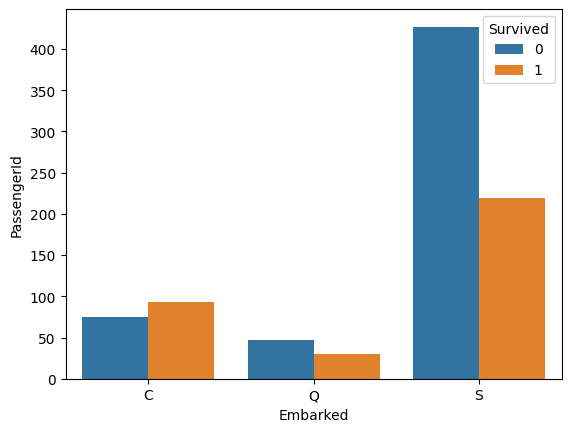

In [144]:
sns.barplot(data=temp7,x="Embarked",y="PassengerId",hue="Survived")

+ From above graph it is clear that there are highest surviving and also non surving peoples are from s port .

## **After analysing this dataset we come to know the following things**
    - higher the class lower will be the fare
    
    - overall survival rate is 39% 

    - people mostly died from 3rd class it mean 3rd class in not safe and 1st class is safer compare to other classes

    - the age where most of the people died is nearby 30 (as most of the people lie in this age group)

    - there is almost double the male as compare to number of female

    - in each class female are less but in 3rd class number of male are almost double then the number of female

    - survival rate of female is more then the male in each class .

    - child below the age 15 has very less survival rate

    - people with age more than 35 has higher survial rate as compare to other age group

    - 1st class fare is almost the 7 times the 1st class fare.

    - There is large number of peoples are from s port and also has highers survival rate.
    